In [293]:
#Import neccesary libriaries

import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

pd.options.mode.chained_assignment = None  # default='warn'

In [294]:
#Download dataset

#!kaggle datasets download -d osmi/mental-health-in-tech-2016

In [295]:
#Unpack the dataset

#!unzip mental-health-in-tech-2016\

In [296]:
#Create pandas DataFrame

df = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')

In [297]:
#Present all the questions and count them

for idx, question in enumerate(df.columns):
    print(f"{idx + 1}. {question}")

1. Are you self-employed?
2. How many employees does your company or organization have?
3. Is your employer primarily a tech company/organization?
4. Is your primary role within your company related to tech/IT?
5. Does your employer provide mental health benefits as part of healthcare coverage?
6. Do you know the options for mental health care available under your employer-provided coverage?
7. Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
8. Does your employer offer resources to learn more about mental health concerns and options for seeking help?
9. Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
10. If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
11. Do you think that discussing a mental health disorder with your employer would have negative c

In [298]:
#Rename features
new_features_names = ['self_empl_flag', 'comp_no_empl',  'tech_comp_flag', 'tech_role_flag', 'mh_coverage_flag',
                    'mh_coverage_awareness_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_anonimity_flag',
                    'mh_medical_leave', 'mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork', 
                    'mh_discussion_supervisor', 'mh_eq_ph_employer', 'mh_conseq_coworkers', 'mh_coverage_flag2',
                    'mh_online_res_flag', 'mh_diagnosed&reveal_clients_flag', 'mh_diagnosed&reveal_clients_impact', 
                    'mh_diagnosed&reveal_cowork_flag', 'mh_cowork_reveal_neg_impact', 'mh_prod_impact', 'mh_prod_impact_perc',
                    'prev_employers_flag', 'prev_mh_benefits', 'prev_mh_benefits_awareness', 'prev_mh_discussion', 
                    'prev_mh_resources', 'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq', 
                    'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_importance_employer', 
                    'prev_mh_conseq_coworkers', 'future_ph_specification', 'why/why_not', 'future_mh_specification',
                    'why/why_not2', 'mh_hurt_on_career', 'mh_neg_view_cowork', 'mh_sharing_friends/fam_flag', 
                    'mh_bad_response_workplace', 'mh_for_others_bad_response_workplace', 'mh_family_hist', 'mh_disorder_past',
                    'mh_disorder_current', 'yes:what_diagnosis?', 'maybe:whats_your_diag', 'mh_diagnos_proffesional',
                    'yes:condition_diagnosed', 'mh_sought_proffes_treatm',  'mh_eff_treat_impact_on_work', 
                    'mh_not_eff_treat_impact_on_work', 'age', 'sex',  'country_live', 'live_us_teritory', 'country_work', 
                    'work_us_teritory',  'work_position','remote_flag']

df.columns = new_features_names
df.head()

,self_empl_flag,comp_no_empl,tech_comp_flag,tech_role_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,...,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,live_us_teritory,country_work,work_us_teritory,work_position,remote_flag
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [299]:
#Drop features with over 70% missing values

dropped_feat = [col for col in df.columns if df[col].isna().sum() >= 0.70 * df.shape[0]]

print(f'Number of features dropped: {len(dropped_feat)}')

print('Columns dropped:\n')
for col_name in dropped_feat:
    print(col_name)

Number of features dropped: 10
Columns dropped:

tech_role_flag
mh_coverage_flag2
mh_online_res_flag
mh_diagnosed&reveal_clients_flag
mh_diagnosed&reveal_clients_impact
mh_diagnosed&reveal_cowork_flag
mh_cowork_reveal_neg_impact
mh_prod_impact
mh_prod_impact_perc
maybe:whats_your_diag


In [300]:
df.drop(dropped_feat, axis=1, inplace=True)

In [301]:
# Encode 'sex' column
# Female - 0
# Man - 1 
# Other - 2
df['sex'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm', 'man', 'male 9:1 female, roughly','Male (cis)',
                                 'Cis male', 'Male.', 'Man', 'Sex is male', 'cis male', 'Malr', 'Dude',
                                "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
                                 'mail', 'M|', 'Male/genderqueer', 'male ', 'Cis Male', 'Male (trans, FtM)',
                                'cisdude', 'cis man', 'MALE'
                               ], value = 'male', inplace = True)

df['sex'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ', 
                                'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
                               'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
                                'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
                                ' Female', 'Cis-woman', 'female-bodied; no feelings about gender', 'AFAB', 'F', 'f',
                                'Woman', 'fm', 'Female assigned at birth '
                               ], value = 'female', inplace = True)

df['sex'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',  'Androgynous', 
                                'Other', 'nb masculine', 'none of your business', 'genderqueer', 'Human', 'Genderfluid',
                                'Enby', 'genderqueer woman', 'mtf', 'Queer','Agender', 'Fluid', 'Nonbinary', 'human',
                                'Unicorn', 'Genderqueer', 'Genderflux demi-girl', 'Transgender woman'
                               ], value = 'other', inplace = True)

In [302]:
#Repair 'comp_no_empl', 

df['comp_no_empl'].replace(to_replace = ['More than 1000'], value = '>1000', inplace = True)

In [303]:
#Detect features with great amount of unique values

uni_values_list = [feature for feature in df.columns if len(df[feature].unique()) > 8]

for feature in uni_values_list:
    print(f"{feature} - {len(df[feature].unique())} unique values")

why/why_not - 1086 unique values
why/why_not2 - 1081 unique values
yes:what_diagnosis? - 129 unique values
yes:condition_diagnosed - 117 unique values
age - 53 unique values
country_live - 53 unique values
live_us_teritory - 48 unique values
country_work - 53 unique values
work_us_teritory - 49 unique values
work_position - 264 unique values


In [304]:
#Detect features with great amount of NaN values

for feature in uni_values_list:
    print(f"{feature} - {df[feature].isna().sum()} NaNs")

why/why_not - 338 NaNs
why/why_not2 - 307 NaNs
yes:what_diagnosis? - 865 NaNs
yes:condition_diagnosed - 722 NaNs
age - 0 NaNs
country_live - 0 NaNs
live_us_teritory - 593 NaNs
country_work - 0 NaNs
work_us_teritory - 582 NaNs
work_position - 0 NaNs


In [305]:
#Drop features that would be hard to interpret because of large amount of missing data or complex structure of a feature

features_to_drop = [feature for feature 
                    in uni_values_list 
                    if len(df[feature].unique()) > 264 
                    or df[feature].isna().sum() > 600]

df.drop(features_to_drop, axis=1, inplace=True)

df.head()

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,...,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,live_us_teritory,country_work,work_us_teritory,work_position,remote_flag
0,0,26-100,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,...,Not applicable to me,Not applicable to me,39,male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,...,Not applicable to me,Not applicable to me,38,male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Sometimes,Sometimes,43,female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [306]:
#to work on: work_position, work_us_terr, live_us, 

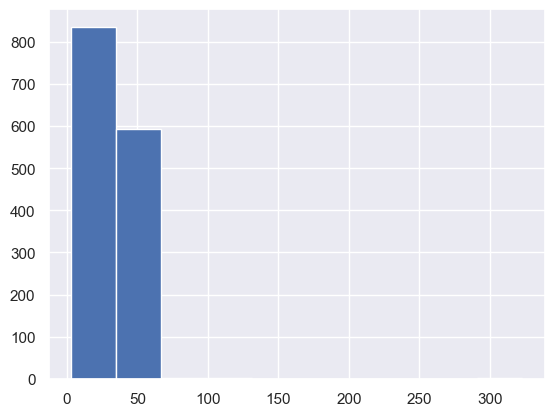

In [307]:
#There is something wrong with the 'age' feature
plt.hist(df['age']);

In [308]:
#min 3? max 323?
df['age'].describe()

count    1433.000000
mean       34.286113
std        11.290931
min         3.000000
25%        28.000000
50%        33.000000
75%        39.000000
max       323.000000
Name: age, dtype: float64

In [309]:
df['age'].nsmallest(5), df['age'].nlargest(5)

(656     3
 808    15
 93     17
 76     19
 559    19
 Name: age, dtype: int64,
 564     323
 372      99
 1117     74
 1221     70
 701      66
 Name: age, dtype: int64)

In [310]:
age_median = df['age'].median()
df['age'].replace(to_replace = df[(df['age'] < 18) | (df['age'] > 75)]['age'].to_list(), value = age_median, inplace = True)
df['age'].describe()

count    1433.000000
mean       34.082345
std         8.072398
min        19.000000
25%        28.000000
50%        33.000000
75%        38.000000
max        74.000000
Name: age, dtype: float64

/Users/alanszpetmanski/opt/anaconda3/envs/ZTM_course/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


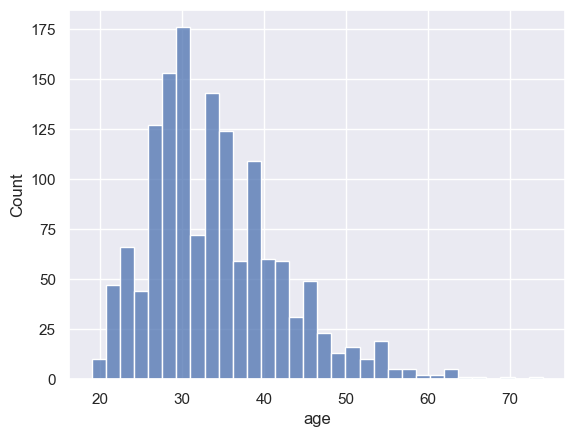

In [311]:
sns.histplot(df['age']);

/Users/alanszpetmanski/opt/anaconda3/envs/ZTM_course/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


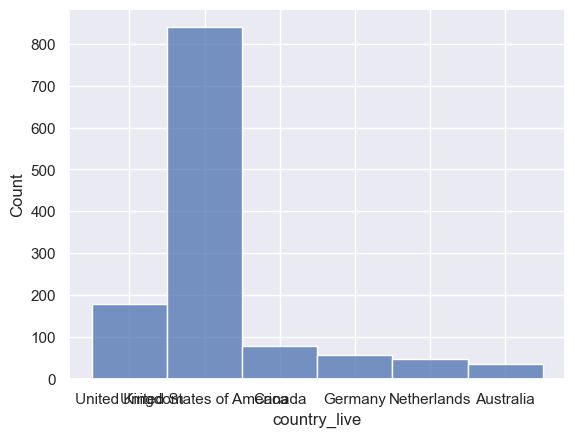

In [312]:
#Drop countries with less than 20 responses
countries_more_20_responses = df['country_live'].value_counts().head(6).index.tolist()
df = df[df['country_live'].isin(countries_more_20_responses)]
sns.histplot(df['country_live']);


/Users/alanszpetmanski/opt/anaconda3/envs/ZTM_course/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


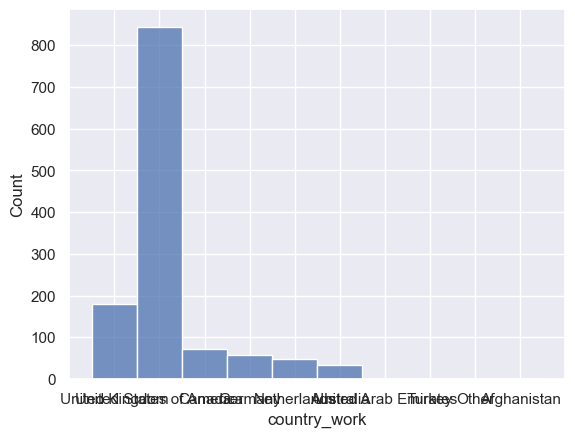

In [313]:
sns.histplot(df['country_work']);

/Users/alanszpetmanski/opt/anaconda3/envs/ZTM_course/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


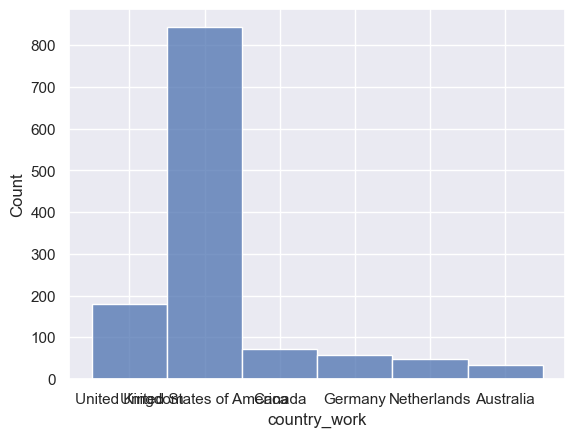

In [314]:
countries_more_20_responses = df['country_work'].value_counts().head(6).index.tolist()
df = df[df['country_work'].isin(countries_more_20_responses)]
sns.histplot(df['country_work']);

In [315]:
#ive_us_teritory - 593 NaNs
#work_us_teritory - 582 NaNs

df.drop(['live_us_teritory', 'work_us_teritory', 'mh_for_others_bad_response_workplace'], axis=1, inplace=True)

In [316]:
df.isna().sum()

self_empl_flag                       0
comp_no_empl                       229
tech_comp_flag                     229
mh_coverage_flag                   229
mh_coverage_awareness_flag         332
mh_employer_discussion             229
mh_resources_provided              229
mh_anonimity_flag                  229
mh_medical_leave                   229
mh_discussion_neg_impact           229
ph_discussion_neg_impact           229
mh_discussion_cowork               229
mh_discussion_supervisor           229
mh_eq_ph_employer                  229
mh_conseq_coworkers                229
prev_employers_flag                  0
prev_mh_benefits                   138
prev_mh_benefits_awareness         138
prev_mh_discussion                 138
prev_mh_resources                  138
prev_mh_anonimity                  138
prev_mh_discuss_neg_conseq         138
prev_ph_discuss_neg_conseq         138
prev_mh_discussion_cowork          138
prev_mh_discussion_supervisor      138
prev_mh_importance_employ

In [317]:
most_popular_positions = df['work_position'].str.split().str[0].value_counts().head(11).index
most_popular_positions

Index(['Back-end', 'Front-end', 'Supervisor/Team', 'Other', 'One-person',
       'Executive', 'DevOps/SysAdmin', 'Dev', 'DevOps/SysAdmin|Back-end',
       'Support', 'Designer'],
      dtype='object', name='work_position')

In [321]:
df['work_position'] = df['work_position'].str.split().str[0]

In [322]:
df = df[df['work_position'].isin(most_popular_positions)]
df.shape

(1107, 46)

In [323]:
df['work_position'].value_counts()

work_position
Back-end                    313
Front-end                   195
Supervisor/Team             161
Other                       100
One-person                   89
Executive                    58
DevOps/SysAdmin              49
Dev                          47
DevOps/SysAdmin|Back-end     38
Support                      29
Designer                     28
Name: count, dtype: int64